<a href="https://colab.research.google.com/github/MuhammadRhakan/final_project/blob/main/1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

In [ ]:
import kagglehub
import time
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import plotly.express as px

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [ ]:
course = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "hossaingh/udemy-courses", "Course_info.csv")
course.shape

/tmp/ipython-input-3-62362134.py:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  course = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "hossaingh/udemy-courses", "Course_info.csv")


(209734, 20)

In [ ]:
course.head(2)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/


In [ ]:
course_filter_lang = course[course['language'].isin({'English'})]
course_filter_lang.shape

(123921, 20)

In [ ]:
course_filter_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123921 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  123921 non-null  float64
 1   title               123921 non-null  object 
 2   is_paid             123921 non-null  bool   
 3   price               123921 non-null  float64
 4   headline            123901 non-null  object 
 5   num_subscribers     123921 non-null  float64
 6   avg_rating          123921 non-null  float64
 7   num_reviews         123921 non-null  float64
 8   num_comments        123921 non-null  float64
 9   num_lectures        123921 non-null  float64
 10  content_length_min  123921 non-null  float64
 11  published_time      123921 non-null  object 
 12  last_update_date    123794 non-null  object 
 13  category            123921 non-null  object 
 14  subcategory         123921 non-null  object 
 15  topic               123371 non-null  ob

In [ ]:
#check unique values for each column
print(course_filter_lang.nunique().reset_index().set_axis(['Features', 'Unique Values'], axis=1).to_markdown(tablefmt='outline'))

+----+--------------------+-----------------+
|    | Features           |   Unique Values |
+====+====================+=================+
|  0 | id                 |          125501 |
|  1 | title              |          124497 |
|  2 | is_paid            |               2 |
|  3 | price              |             161 |
|  4 | headline           |          121424 |
|  5 | num_subscribers    |           18370 |
|  6 | avg_rating         |            5573 |
|  7 | num_reviews        |            4321 |
|  8 | num_comments       |            1734 |
|  9 | num_lectures       |             643 |
| 10 | content_length_min |            2763 |
| 11 | published_time     |          125433 |
| 12 | last_update_date   |            3511 |
| 13 | category           |              13 |
| 14 | subcategory        |             130 |
| 15 | topic              |            3743 |
| 16 | language           |               2 |
| 17 | course_url         |          125501 |
| 18 | instructor_name    |       

In [ ]:
def duplicate_check(data):
  print("\n📌 Checking for Duplicate Values")
  print("-" * 45)

  duplicated_rows = data.duplicated().sum()
  if data.duplicated().any():
    print("\n⚠️ Duplicate values found! Cleaning up...")
    print("🔄 Removing duplicates...")
    data = data.drop_duplicates()
    print(f"✅ Done! {duplicated_rows} duplicates have been removed.\n")
  else:
    print("\n✅ No duplicate values found. Data is clean!\n")

  print("-" * 45)

  return data

course_no_duplicate = duplicate_check(course_filter_lang)


📌 Checking for Duplicate Values
---------------------------------------------

✅ No duplicate values found. Data is clean!

---------------------------------------------


In [ ]:
def missing_values_check(data):
  print("\n📌 Automatically Checking for Missing Values")
  print("🔄 Showing missing values...\n")

  percentage = (data.isnull().sum() / data.shape[0]) * 100
  missing_values = pd.DataFrame({
      'Features': data.columns,
      'Missing Values': data.isnull().sum(),
      'Percentage': [f'{round(value,2)}%' for value in percentage]
      })
  missing_values.reset_index(drop=True, inplace=True)

  print(missing_values.to_markdown(tablefmt='pipe', index=False))
  print(f'\nData Shape:  {data.shape}')

missing_values_check(course_no_duplicate)


📌 Automatically Checking for Missing Values
🔄 Showing missing values...

| Features           |   Missing Values | Percentage   |
|:-------------------|-----------------:|:-------------|
| id                 |                0 | 0.0%         |
| title              |                0 | 0.0%         |
| is_paid            |                0 | 0.0%         |
| price              |                0 | 0.0%         |
| headline           |               20 | 0.02%        |
| num_subscribers    |                0 | 0.0%         |
| avg_rating         |                0 | 0.0%         |
| num_reviews        |                0 | 0.0%         |
| num_comments       |                0 | 0.0%         |
| num_lectures       |                0 | 0.0%         |
| content_length_min |                0 | 0.0%         |
| published_time     |                0 | 0.0%         |
| last_update_date   |              127 | 0.1%         |
| category           |                0 | 0.0%         |
| subcategory 

In [ ]:
def fill_empty_date(data, features):
  data = data.copy()
  for col in features:
    data[col] = pd.to_datetime(data[col])

  data[features[1]] = data[features[1]].fillna(data[features[0]])

  return data


def get_latest_five_years(data, features):
  data = fill_empty_date(data, features)
  latest_year = data[features[0]].max().year
  last_five_year = latest_year - 5

  data = data[data[features[0]].dt.year > last_five_year]

  return data

In [ ]:
def remove_null(data):
  data = get_latest_five_years(data, ['published_time', 'last_update_date'])

  null_values = data[(data['num_lectures'] == 0) |
                (data['content_length_min'] == 0) |
                ((data['avg_rating'] == 0) & (data['num_reviews'] > 0))].index
  course_dropna = data.drop(index=null_values).dropna()
  print(f'Data after cleaning:  {course_dropna.shape}')

  return course_dropna

course_dropna = remove_null(course_no_duplicate)

Data after cleaning:  (89366, 20)


In [ ]:
def get_numerical_attributes(data, exclude):
  numerical = []
  print(f"Numerical Attributes:")
  for num in data.select_dtypes(include = 'number').drop(columns='id').columns:
    if num != exclude:
      numerical.append(num)
      print(f"• {num}")

  return numerical

In [ ]:
numerical = get_numerical_attributes(course_dropna, exclude='avg_rating')

Numerical Attributes:
• price
• num_subscribers
• num_reviews
• num_comments
• num_lectures
• content_length_min


In [ ]:
def outlier_trimming(data, features, par, skip, fg1, fg2):
  data = data.copy()
  data.loc[data[skip] == 0, skip] = np.nan

  trim = data.copy()
  for col in features:
    outliers = data[col].quantile(par)
    trim = trim[trim[col] < outliers]

  transformed = trim.copy()
  transformed[fg1] = np.log1p(transformed[fg1])
  transformed[fg2] = np.sqrt(transformed[fg2])
  transformed[skip] = np.sqrt(transformed[skip])

  return trim, transformed

In [ ]:
def outliers_handling(data, features, par, skip):
  data = data.copy()
  data.loc[data[skip] == 0, skip] = np.nan

  clip = data.copy()
  for col in features:
    upper = data[col].quantile(par)
    lower = data[col].quantile(1-par)
    clip[col] = clip[col].clip(upper=upper, lower=lower)

  transformed = clip.copy()
  transformed[features] = np.log1p(transformed[features])

  dataset = {'Original': data, 'Trimmed': clip, 'Transformed': transformed}
  rows = len(dataset)
  cols = len(features)
  colors = sns.color_palette("pastel", n_colors=len(dataset))

  fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
  for i, (key,values) in enumerate(dataset.items()):
    for j, col in enumerate(features):
      sns.boxplot(y=dataset[key][col], ax=ax[i][j], color=colors[i])
      ax[i][j].set_title(col)
      ax[i][j].set_xlabel(key)
      ax[i][j].set_ylabel('')

  plt.tight_layout()
  plt.show()

  print(f'\n®️ Original  : {len(data)}')
  print(f'✂️ After Trim  : {len(clip)}')
  print(f'⚖️ Elimination Ratio: {round(((len(data)-len(clip))/len(data))*100,2)}%')
  print('-'*35)
  print(f'📐 Trimmed Shape      : {clip.shape} ')
  print(f'📐 Transformed Shape  : {transformed.shape} ')

  return clip, transformed

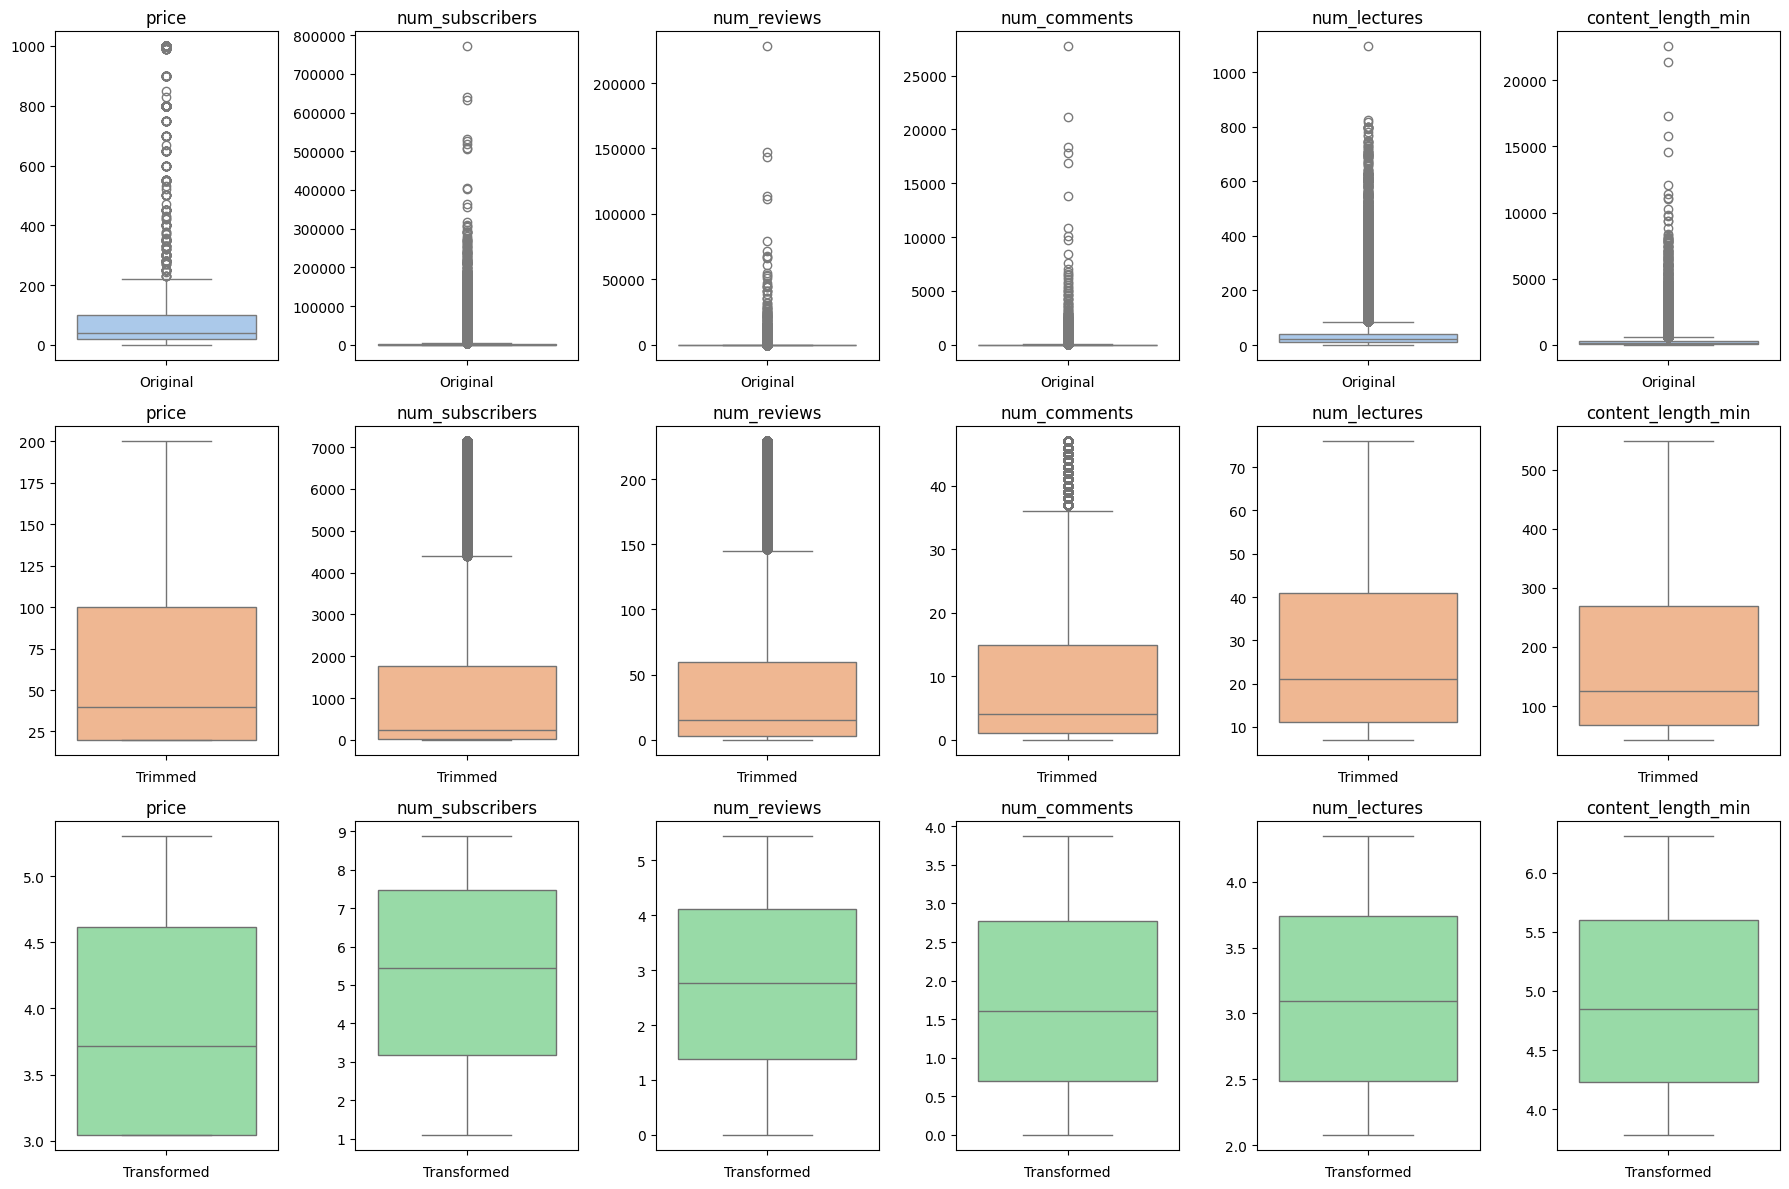


®️ Original  : 89366
✂️ After Trim  : 89366
⚖️ Elimination Ratio: 0.0%
-----------------------------------
📐 Trimmed Shape      : (89366, 20) 
📐 Transformed Shape  : (89366, 20) 


In [ ]:
course_clean, course_clean_scaled = outliers_handling(
    course_dropna,
    numerical,
    par=0.9,
    skip='price'
    )

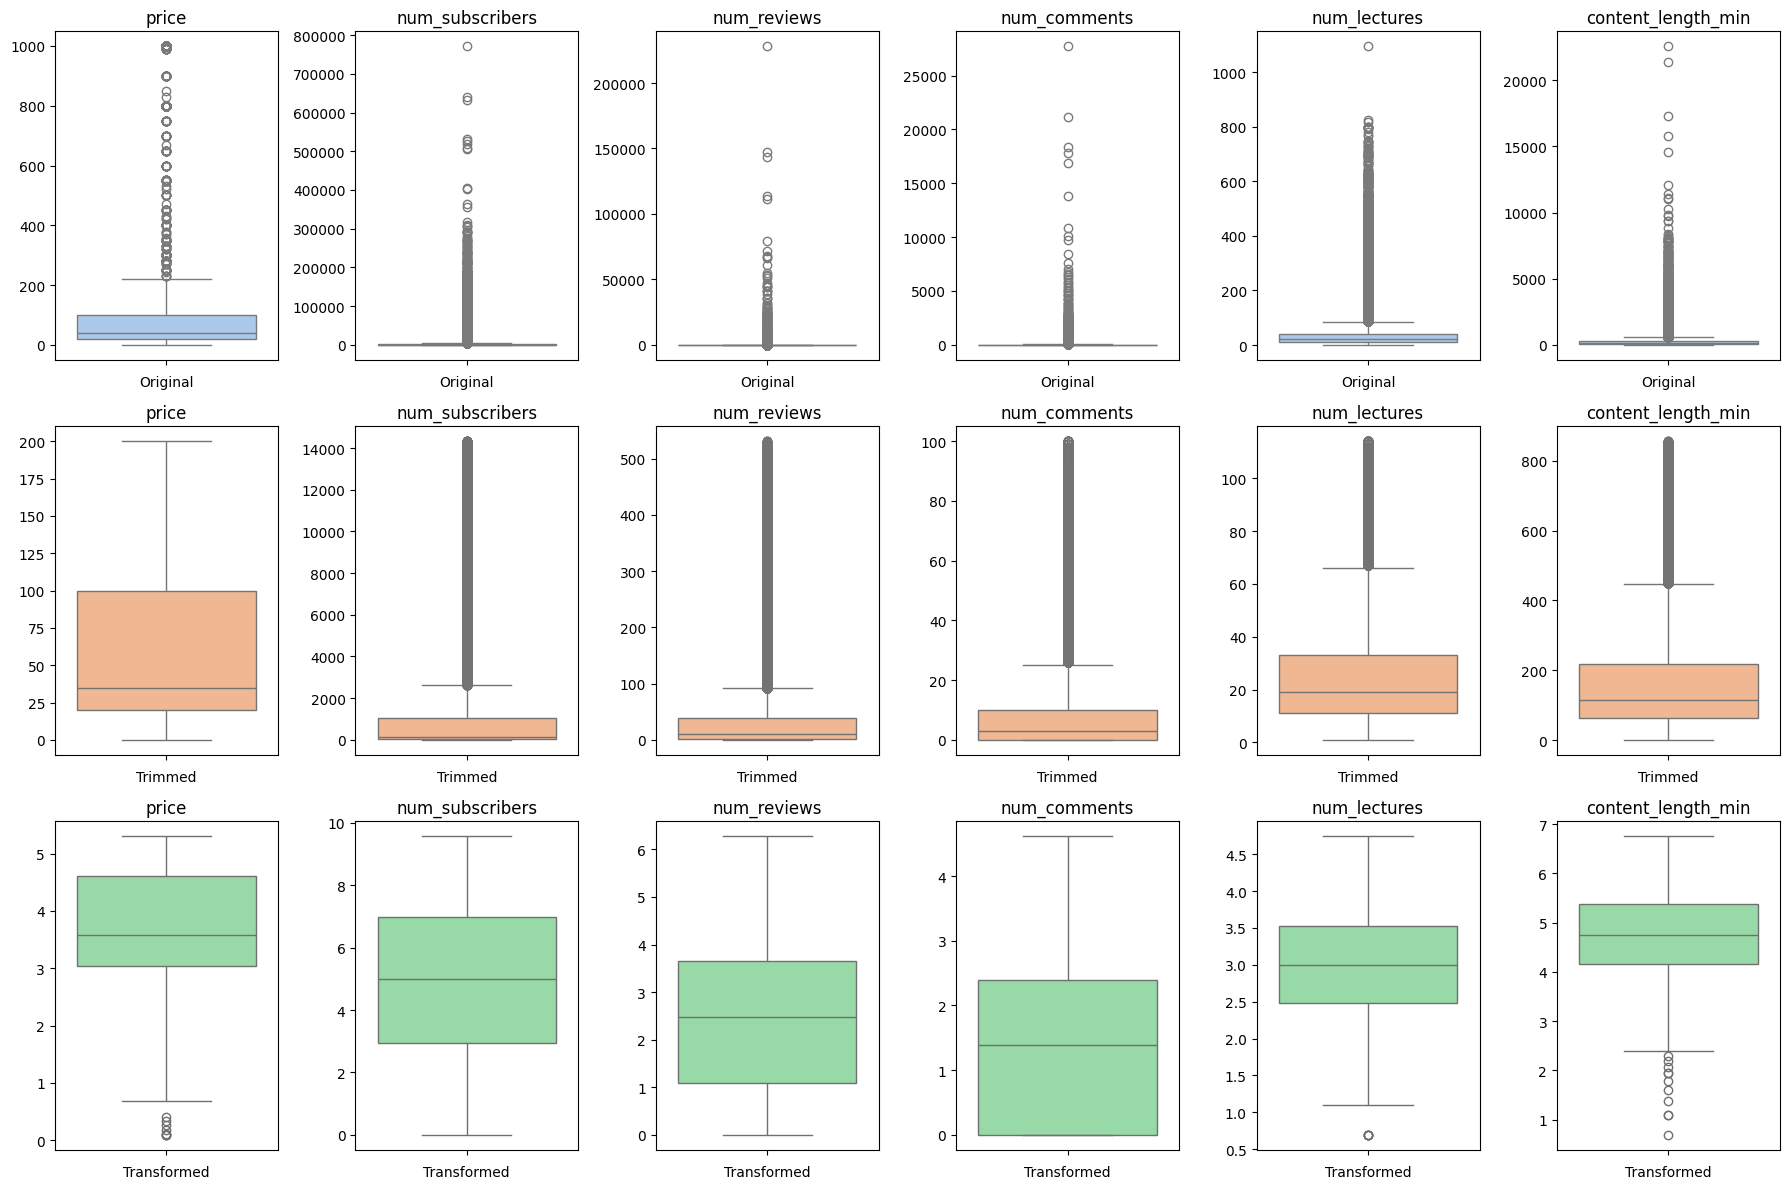


®️ Original  : 89366
✂️ After Trim  : 76035
⚖️ Elimination Ratio: 14.92%
-----------------------------------
📐 Trimmed Shape      : (76035, 20) 
📐 Transformed Shape  : (76035, 20) 


In [ ]:
def outliers_handling(data, features, par, skip, g1, g2):
  data = data.copy()
  data.loc[data[skip] == 0, skip] = np.nan

  outlier_indices = set()
  for col in features:
    upper = data[col].quantile(par)
    outliers = data[col][data[col] > upper].index
    outlier_indices.update(outliers)

  trim = data.drop(index=outlier_indices)
  transformed = trim.copy()
  transformed[g1] = np.log1p(transformed[g1])
  transformed[g2] = np.log1p(transformed[g2])

  dataset = {'Original': data, 'Trimmed': trim, 'Transformed': transformed}
  rows = len(dataset)
  cols = len(features)
  colors = sns.color_palette("pastel", n_colors=len(dataset))

  fig, ax = plt.subplots(rows, cols, figsize=(cols * 3, rows * 4))
  for i, (key,values) in enumerate(dataset.items()):
    for j, col in enumerate(features):
      sns.boxplot(y=dataset[key][col], ax=ax[i][j], color=colors[i])
      ax[i][j].set_title(col)
      ax[i][j].set_xlabel(key)
      ax[i][j].set_ylabel('')

  plt.tight_layout()
  plt.show()

  print(f'\n®️ Original  : {len(data)}')
  print(f'✂️ After Trim  : {len(trim)}')
  print(f'⚖️ Elimination Ratio: {round(((len(data)-len(trim))/len(data))*100,2)}%')
  print('-'*35)
  print(f'📐 Trimmed Shape      : {trim.shape} ')
  print(f'📐 Transformed Shape  : {transformed.shape} ')



outliers_handling(
    course_dropna,
    numerical,
    par=0.95,
    skip='price',
    g1 = ['num_subscribers', 'num_reviews', 'num_comments'],
    g2 = ['price', 'num_lectures', 'content_length_min'])

In [ ]:
def basic_statistics(data, features=numerical):
  table = data[features].describe().T
  table['IQR'] = table['75%'] - table['25%']
  table['upper bound'] = table['75%'] + 1.5 * table['IQR']
  table['lower bound'] = table['25%'] - 1.5 * table['IQR']
  table = table.round(2)

  return table

def comparison():
  stats = {
    'Original': basic_statistics(course_dropna),
    'Trimmed': basic_statistics(course_clean),
    'Log_Trimmed': basic_statistics(course_clean_scaled)}

  for key,values in stats.items():
    print(f"{key}\n{values.to_markdown(tablefmt='fancy_grid')}\n")

comparison()

Original
╒════════════════════╤═════════╤═════════╤══════════╤═══════╤═══════╤════════╤═════════╤════════╤═══════╤═══════════════╤═══════════════╕
│                    │   count │    mean │      std │   min │   25% │    50% │     75% │    max │   IQR │   upper bound │   lower bound │
╞════════════════════╪═════════╪═════════╪══════════╪═══════╪═══════╪════════╪═════════╪════════╪═══════╪═══════════════╪═══════════════╡
│ price              │   89366 │   70.72 │   102.44 │     0 │ 19.99 │  29.99 │   99.99 │    999 │    80 │        219.99 │       -100.01 │
├────────────────────┼─────────┼─────────┼──────────┼───────┼───────┼────────┼─────────┼────────┼───────┼───────────────┼───────────────┤
│ num_subscribers    │   89366 │ 3292.55 │ 13675    │     0 │ 23    │ 230    │ 1775    │ 771176 │  1752 │       4403    │      -2605    │
├────────────────────┼─────────┼─────────┼──────────┼───────┼───────┼────────┼─────────┼────────┼───────┼───────────────┼───────────────┤
│ num_reviews        │   

In [ ]:
def heatmap(data, features):
  corr = data[features].corr().round(2)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  corr_masked = corr.mask(mask)

  fig = px.imshow(
      corr_masked,
      text_auto=True,
      aspect="auto",
      color_continuous_scale="RdBu_r",
      zmin=-1,
      zmax=1)

  fig.update_layout(
      title="Feature Correlation Heatmap",
      width=800,
      height=600,
      margin=dict(l=50, r=50, t=50, b=50),
      xaxis_tickangle=0,
      font=dict(size=10))

  fig.show()

heatmap(course_clean, numerical)

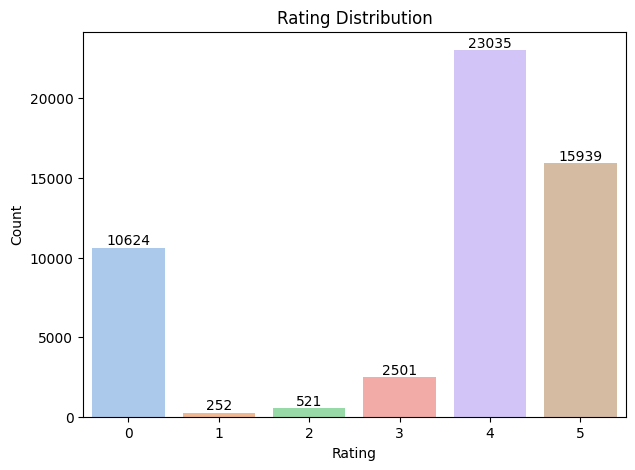

In [ ]:
def rating_distribution(data, feature):
  data.loc[:,'rating'] = data[feature].round().astype(int)

  plt.figure(figsize=(7,5))
  graph = sns.countplot(x='rating', data=data, width=0.8, palette='pastel', hue='rating', legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.title('Rating Distribution')
  plt.xlabel('Rating')
  plt.ylabel('Count')

  plt.show()

rating_distribution(course_clean, 'avg_rating')

In [ ]:
def datetime_convert(data, features):
  data = data.copy()
  latest_date = '2022-10-10'
  latest_date = pd.to_datetime(latest_date, format='%Y-%m-%d').tz_localize(None)

  for col in features:
      data[col] = pd.to_datetime(data[col]).dt.tz_localize(None)

  data['published_year'] = data['published_time'].dt.year
  data['published_month'] = data['published_time'].dt.month_name()

  group_year = pd.pivot_table(data, index='published_year',
                               values=['id','num_subscribers', 'num_reviews', 'num_comments', 'num_lectures'],
                               aggfunc={'id': len,
                                        'num_subscribers': 'sum',
                                        'num_reviews':'sum',
                                        'num_comments':'sum',
                                        'num_lectures':'sum'})

  data['published_days_ago'] = (latest_date - data['published_time']).dt.days
  data['updated_days_ago'] = (latest_date - data['last_update_date']).dt.days

  return {1: data,
          2: group_year}

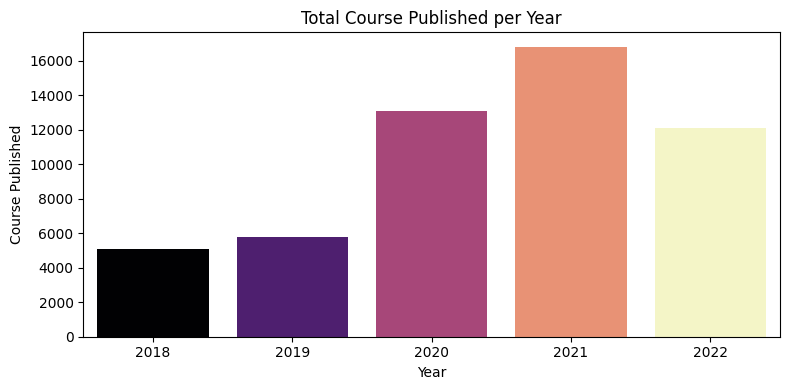

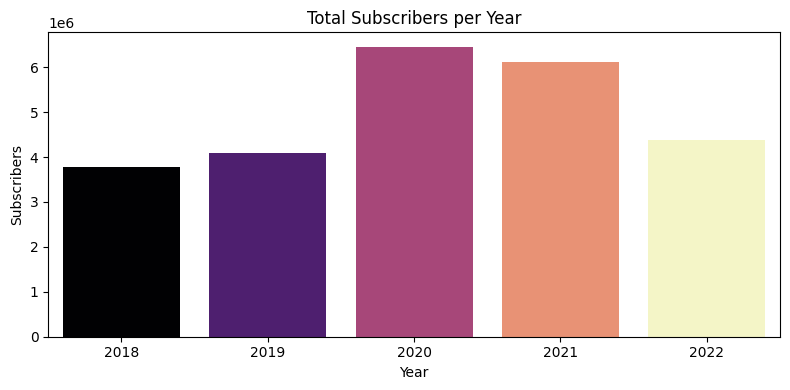

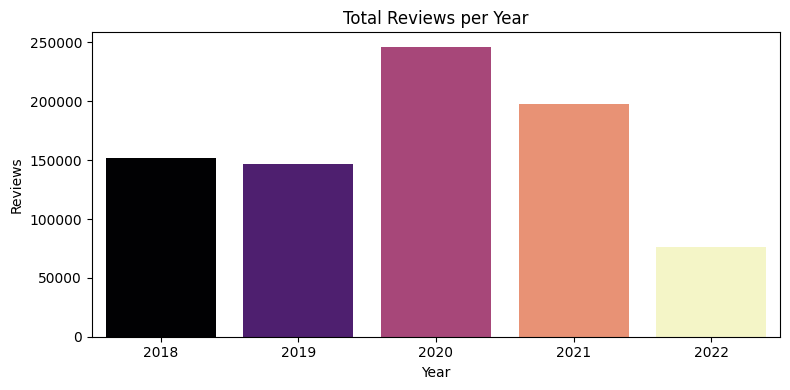

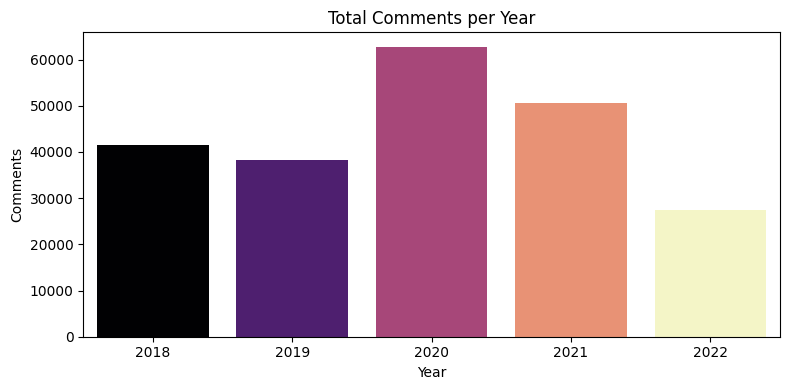

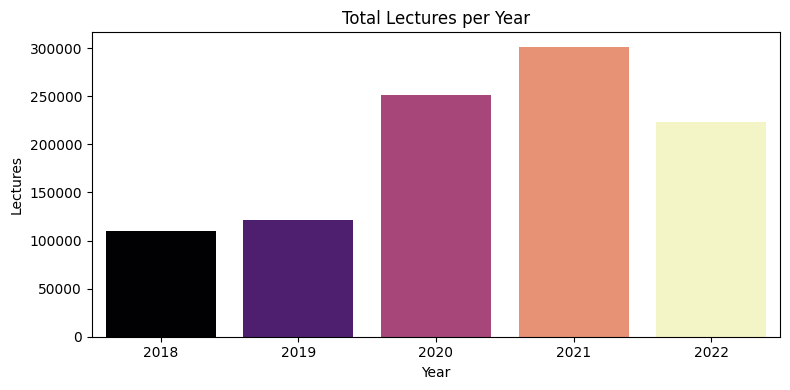

In [ ]:
def annual_check(pivot):
  resource = {'id': 'Course Published',
              'num_subscribers': 'Subscribers',
              'num_reviews': 'Reviews',
              'num_comments':'Comments',
              'num_lectures': 'Lectures'}

  for key, val in resource.items():
    plt.figure(figsize=(8,4))
    sns.barplot(data=pivot,
                hue=pivot.index,
                x=pivot.index,
                y=pivot[key],
                palette='magma',
                legend=False)
    plt.title(f'Total {val} per Year')
    plt.xlabel('Year')
    plt.ylabel(val)

    plt.tight_layout()
    plt.show()

annual_check(datetime_convert(course_clean, ['published_time', 'last_update_date'])[2])

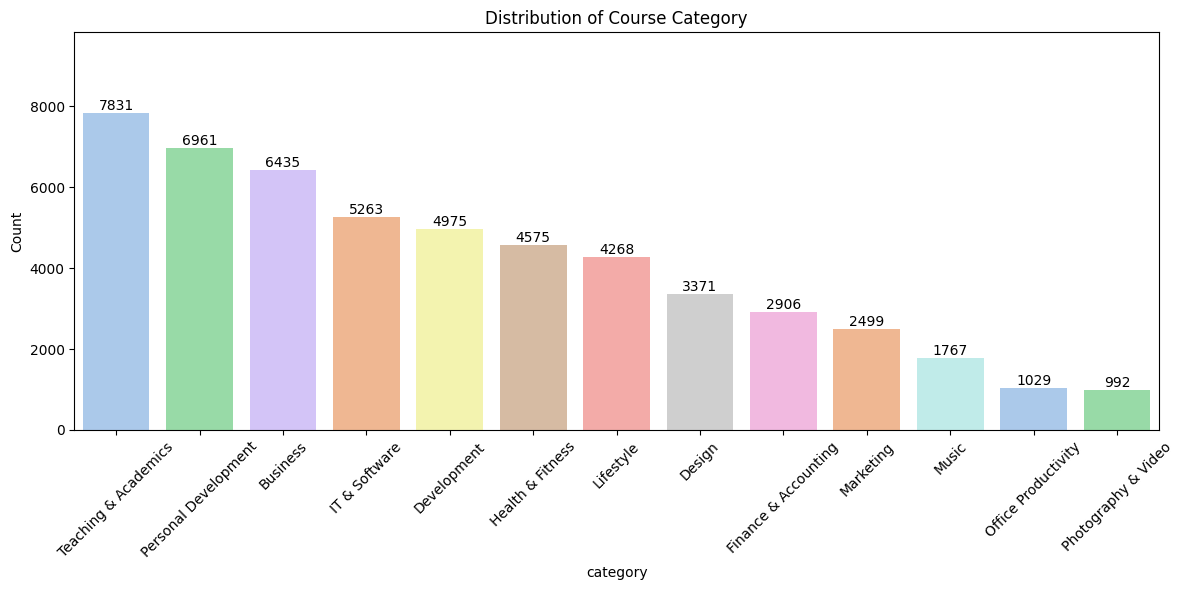

In [ ]:
def category_check(data, feature):
  plt.figure(figsize=(12,6))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.xticks(rotation=45)
  plt.ylim(0, max(data[feature].value_counts() + 2000))
  plt.ylabel('Count')
  plt.title('Distribution of Course Category')

  plt.tight_layout()
  plt.show()

category_check(course_clean, 'category')

In [ ]:
def treemap(data, feature, target):
    fig = px.treemap(
        data,
        path=[feature, target],
        values=[1]*len(data))

    fig.update_traces(
        texttemplate='%{label}<br>%{value} (%{percentParent:.2%})',
        textposition="middle center")

    fig.show()

treemap(course_clean, 'category', 'subcategory')

Topics with more than 500 use
+---------+---------+
| topic   | count   |
+=========+=========+
+---------+---------+


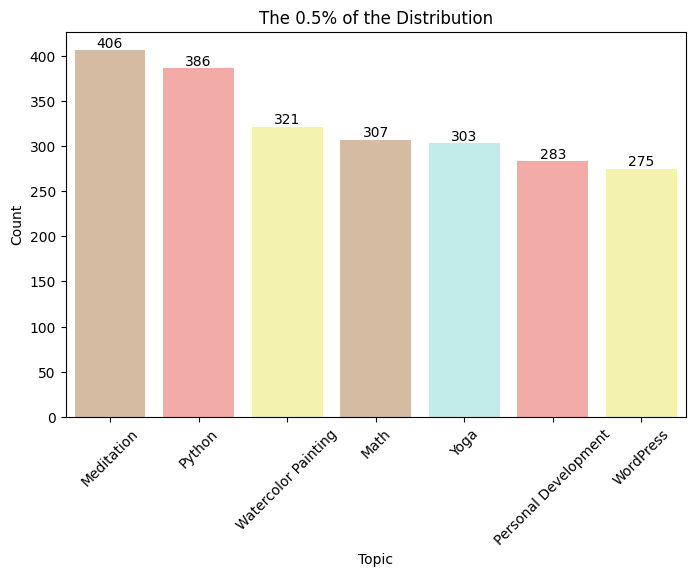

In [ ]:
def topic_check(data, feature):
  topics = data[feature].value_counts()
  topics = topics[topics > 500]
  print("Topics with more than 500 use")
  print(topics.to_markdown(tablefmt='outline'))

  topics_count = data[feature].value_counts(normalize=True)
  significant_topic = topics_count[topics_count > 0.005].index
  grouped_topic = data[feature].apply(lambda n: n if n in significant_topic else 'Other')

  plt.figure(figsize=(8,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=significant_topic,
                        hue=feature,
                        legend=False)

  for i in graph.containers:
    plt.bar_label(i, label_type='edge')

  plt.title('The 0.5% of the Distribution')
  plt.xlabel('Topic')
  plt.ylabel('Count')

  plt.xticks(rotation=45)

  plt.show()

topic_check(course_clean, 'topic')

In [ ]:
def revenue_check(data):
  data = data.copy()
  data.loc[:,'revenue'] = data['price'] * data['num_subscribers']
  data.sort_values(by='revenue', ascending=False, inplace=True)

  leaderboard = data.groupby('instructor_name')['revenue'].sum().sort_values(ascending=False)


  summary = pd.DataFrame({
      'Instructor': leaderboard.index,
      'Revenue': leaderboard.values,
      'Total Course Published': data['instructor_name'].value_counts().sort_values(ascending=False).values,
      'Teaching Duration': data.groupby('instructor_name')['content_length_min'].sum().sort_values(ascending=False).values
  })

  return summary

revenue_check(course_clean)

,Instructor,Revenue,Total Course Published,Teaching Duration
0,Laurence Svekis,93833089.99,1015,241111.0
1,Educational Engineering Team,84555399.72,399,43212.0
2,Scott Paton,43122354.66,281,39618.0
3,Bluelime Learning Solutions,39663657.63,271,31943.0
4,Packt Publishing,37869216.05,265,30887.0
...,...,...,...,...
35315,Pasteur Tran,0.00,1,9.0
35316,Pastor Pat Buckley,0.00,1,6.0
35317,Patch Dulay,0.00,1,6.0
35318,Jawad Bhatti,0.00,1,4.0


In [ ]:
def engagement_check(data):
  engagement = data.copy()

  course_published = engagement.groupby('instructor_name')['title'].count()
  high_eng = engagement.groupby('instructor_name')['num_subscribers'].sum()

  summary = pd.concat([course_published, high_eng], axis=1)

  top_1_percent = math.ceil(len(summary) * 0.01)
  summary.head(top_1_percent).sort_values(by='num_subscribers', ascending=False)

  top_1_quantile = summary['num_subscribers'].quantile(0.99)
  return summary[summary['num_subscribers'] >= top_1_quantile].sort_values(by='title', ascending=False)

engagement_check(course_clean)

,title,num_subscribers
instructor_name,,
Packt Publishing,1015,269395.0
Illumeo Learning,399,52322.0
Bluelime Learning Solutions,271,567600.0
Bina Nusantara University,207,257164.0
Pradeep Aggarwal,207,287298.0
...,...,...
Elena Davydkina,5,33127.0
Mark Nielsen,4,31260.0
Ahmad Traboulsi,4,30423.0


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

def check_instructor(data, feature):
    # Basic counts & percentages
    value_counts = data[feature].value_counts()
    percentages = value_counts / len(data) * 100

    # Combine
    result_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

    # Additional insights
    num_unique = data[feature].nunique()
    mode = data[feature].mode()[0]
    mode_freq = value_counts.iloc[0]
    mode_pct = round( mode_freq / len(data) * 100, 2)

    unique_ratio = num_unique / len(data)

    # Entropy (Shannon)
    ent = entropy(value_counts, base=2)

    print(result_df.head(10).to_markdown(tablefmt='outline', index=True))
    print("\n=== Summary ===")
    print(f"Unique values: {num_unique}")
    print(f"Most frequent value: '{mode}' ({mode_freq} times, {mode_pct:.2f}%)")
    print(f"Unique-to-total ratio: {unique_ratio:.4f}")
    print(f"Entropy (bits): {ent:.4f}")


check_instructor(course_clean, 'instructor_name')

+-----------------------------+---------+--------------+
| instructor_name             |   Count |   Percentage |
+=============================+=========+==============+
| Packt Publishing            |     859 |     0.961216 |
| Bluelime Learning Solutions |     323 |     0.361435 |
| HowExpert                   |     281 |     0.314437 |
| Sarita Wariyer              |     268 |     0.29989  |
| Illumeo Learning            |     252 |     0.281986 |
| Eric Yeboah                 |     218 |     0.243941 |
| Dr. Dheeraj Mehrotra        |     208 |     0.232751 |
| Mustafa Alawi               |     206 |     0.230513 |
| Integrity Training          |     201 |     0.224918 |
| Learn Tech Plus             |     189 |     0.21149  |
+-----------------------------+---------+--------------+

=== Summary ===
Unique values: 33792
Most frequent value: 'Packt Publishing' (859 times, 0.96%)
Unique-to-total ratio: 0.3781
Entropy (bits): 13.9142
